<a href="https://colab.research.google.com/github/Olgera/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymorphy2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.0 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [ ]:
import re
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import re
from pymorphy2 import MorphAnalyzer
import gensim
from gensim.models import LdaModel, LdaMulticore

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# 1 часть

In [ ]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving new_dataset.csv to new_dataset.csv


In [ ]:
import pandas
dataset = pandas.read_csv('new_dataset.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset.head()

,Unnamed: 0.1,Unnamed: 0,text,sentiment
0,0,43956,Развода на деньги нет\nНаблюдаюсь в Лайфклиник...,1
1,1,17755,Отель выбрали потому что рядом со стадионом. О...,0
2,2,20269,"Вылечили\nГноился с рождения глазик, в поликли...",1
3,3,16648,Хорошее расположение.С вокзала дошли пешком.Но...,0
4,4,27879,"Отличное месторасположение,прекрасный вид,особ...",1


# Проведем EDA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


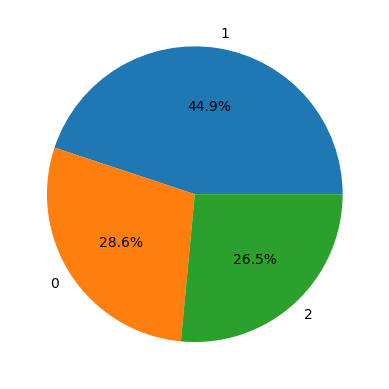

In [ ]:
dataset['sentiment'] = dataset['sentiment']
plt.pie(dataset['sentiment'].value_counts(), labels=dataset['sentiment'].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [ ]:
dataset['Length'] = dataset['text'].str.len()
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0.1,Unnamed: 0,text,sentiment,Length
0,0,43956,Развода на деньги нет\nНаблюдаюсь в Лайфклиник...,1,152
1,1,17755,Отель выбрали потому что рядом со стадионом. О...,0,720
2,2,20269,"Вылечили\nГноился с рождения глазик, в поликли...",1,306
3,3,16648,Хорошее расположение.С вокзала дошли пешком.Но...,0,400
4,4,27879,"Отличное месторасположение,прекрасный вид,особ...",1,473


График длины предложений с выведенными минимумом и максимумом

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


22
33926


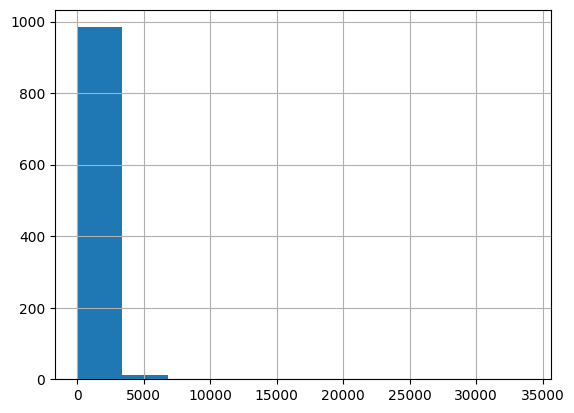

In [ ]:
dataset[ 'Length' ].hist()
print(dataset[ 'Length' ].min())
print(dataset[ 'Length' ].max())

In [ ]:
def word_count(text):
    text_list = text.split()
    return len(text_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset['word_count'] = dataset['text'].apply(word_count)
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0.1,Unnamed: 0,text,sentiment,Length,word_count
0,0,43956,Развода на деньги нет\nНаблюдаюсь в Лайфклиник...,1,152,22
1,1,17755,Отель выбрали потому что рядом со стадионом. О...,0,720,114
2,2,20269,"Вылечили\nГноился с рождения глазик, в поликли...",1,306,40
3,3,16648,Хорошее расположение.С вокзала дошли пешком.Но...,0,400,49
4,4,27879,"Отличное месторасположение,прекрасный вид,особ...",1,473,55


График количества слов в отзыве с выведенными минимумом и максимумом

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3
4400


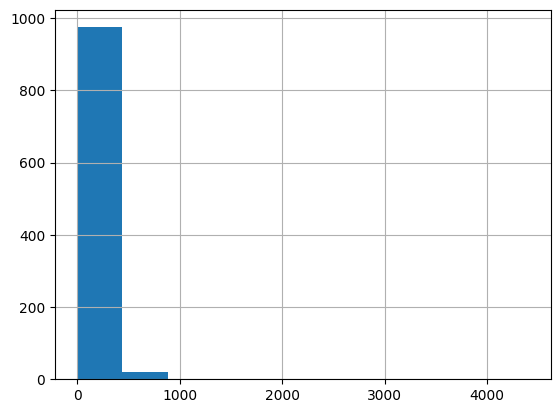

In [ ]:
dataset['word_count'].hist()
print(dataset[ 'word_count' ].min())
print(dataset[ 'word_count' ].max())

In [ ]:
dataset['mean_word_length'] = dataset['text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0.1,Unnamed: 0,text,sentiment,Length,word_count,mean_word_length
0,0,43956,Развода на деньги нет\nНаблюдаюсь в Лайфклиник...,1,152,22,5.909091
1,1,17755,Отель выбрали потому что рядом со стадионом. О...,0,720,114,5.324561
2,2,20269,"Вылечили\nГноился с рождения глазик, в поликли...",1,306,40,6.650000
3,3,16648,Хорошее расположение.С вокзала дошли пешком.Но...,0,400,49,7.183673
4,4,27879,"Отличное месторасположение,прекрасный вид,особ...",1,473,55,7.618182


График средней длины слова с выведенными минимумом и максимумом

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3.142857142857143
9.05


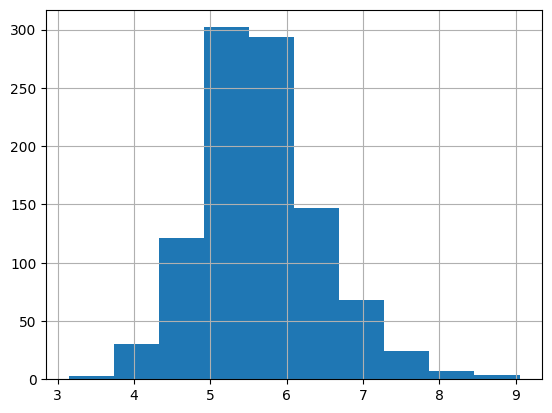

In [ ]:
dataset['mean_word_length'].hist()
print(dataset[ 'mean_word_length' ].min())
print(dataset[ 'mean_word_length' ].max())

In [ ]:
dataset['mean_sent_length'] = dataset['text'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0.1,Unnamed: 0,text,sentiment,Length,word_count,mean_word_length,mean_sent_length
0,0,43956,Развода на деньги нет\nНаблюдаюсь в Лайфклиник...,1,152,22,5.909091,151.000000
1,1,17755,Отель выбрали потому что рядом со стадионом. О...,0,720,114,5.324561,30.347826
2,2,20269,"Вылечили\nГноился с рождения глазик, в поликли...",1,306,40,6.650000,152.000000
3,3,16648,Хорошее расположение.С вокзала дошли пешком.Но...,0,400,49,7.183673,400.000000
4,4,27879,"Отличное месторасположение,прекрасный вид,особ...",1,473,55,7.618182,473.000000


График средней длины предложений с выведенными минимумом и максимумом

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7.666666666666667
1411.0


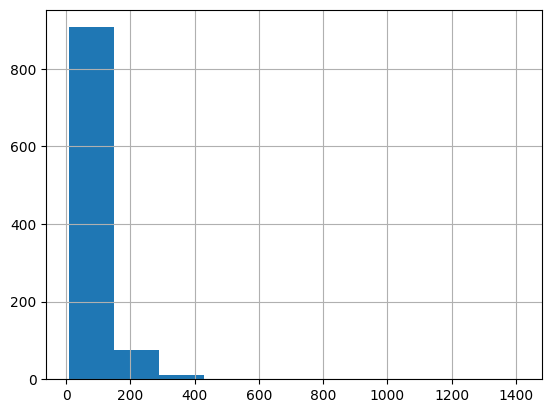

In [ ]:
dataset['mean_sent_length'].hist()
print(dataset[ 'mean_sent_length' ].min())
print(dataset[ 'mean_sent_length' ].max())

Распределение гистограмм было не очень показательным, отрисуем ящики с усами для разных sentiment.

In [ ]:
def visualize(col):

    print()
    sns.boxplot(y=dataset[col], hue=dataset['sentiment'])
    plt.ylabel(col)


    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length

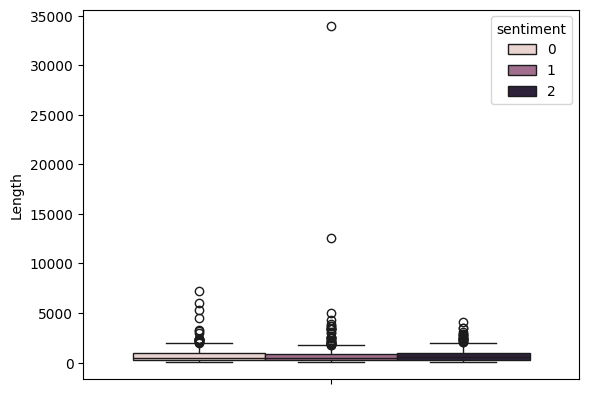

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

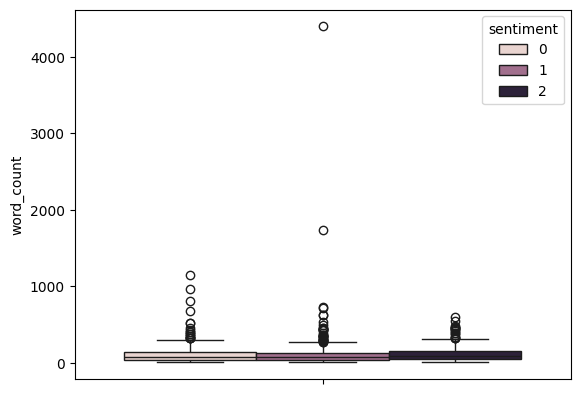

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

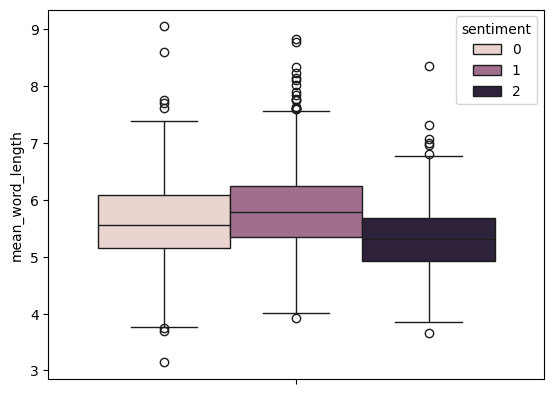

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

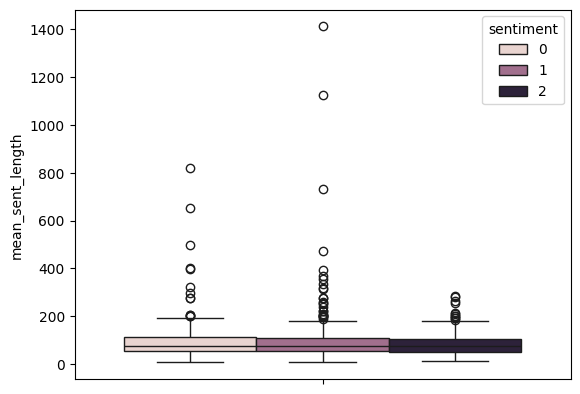

In [ ]:
features = dataset.columns.tolist()[4:]
for feature in features:
    visualize(feature)

Видим, что по количеству выбросов лидируют положительные отзывы. Негативные же имеют наименьшее количество выбросов, и медиана длин у них чуть меньше.

Перед тем как считать количество самых популярных слов и словосочетания, почистим наш датасет от стоп-слов.

In [ ]:
def clean(text):

    text = text.lower()
    text = re.sub('[^а-я А-Я a-z A-Z]+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join([word for word in text.split() if word not in stopwords.words('russian')])

    return text

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset['text'] = dataset['text'].apply(clean)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list

dataset['text_lists'] = dataset['text'].apply(corpus)
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0.1,Unnamed: 0,text,sentiment,Length,word_count,mean_word_length,mean_sent_length,text_lists
0,0,43956,развода деньги наблюдаюсь лайфклиник беременно...,1,152,22,5.909091,151.000000,"[развода, деньги, наблюдаюсь, лайфклиник, бере..."
1,1,17755,отель выбрали рядом стадионом отель номер боль...,0,720,114,5.324561,30.347826,"[отель, выбрали, рядом, стадионом, отель, номе..."
2,2,20269,вылечили гноился рождения глазик поликлинике н...,1,306,40,6.650000,152.000000,"[вылечили, гноился, рождения, глазик, поликлин..."
3,3,16648,хорошее расположение вокзала дошли пешком ночь...,0,400,49,7.183673,400.000000,"[хорошее, расположение, вокзала, дошли, пешком..."
4,4,27879,отличное месторасположение прекрасный вид особ...,1,473,55,7.618182,473.000000,"[отличное, месторасположение, прекрасный, вид,..."


In [ ]:
corpus = []
for i in range(0, dataset.shape[0]):
    corpus += dataset['text_lists'][i]
len(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


73973

In [ ]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('очень', 754),
 ('это', 658),
 ('отель', 265),
 ('просто', 225),
 ('спасибо', 224),
 ('года', 190),
 ('т', 167),
 ('номер', 166),
 ('время', 161),
 ('нам', 150)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


<Axes: >

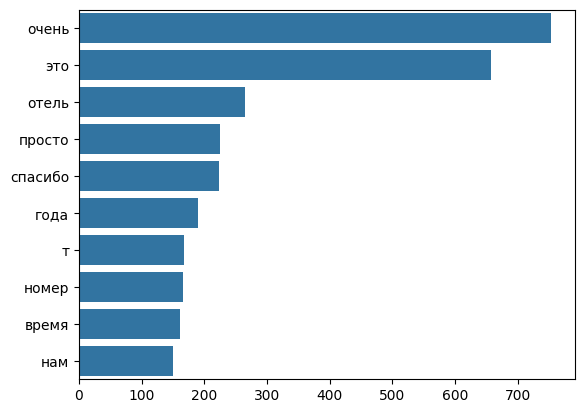

In [ ]:
x, y  = [], []
for word, count in mostCommon:
    x.append(word)
    y.append(count)

sns.barplot(x=y,y=x)

Выше приведен график самых популярных слов.

Построим график N-граммов, или, точнее, биграмм.

In [ ]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(dataset['text'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


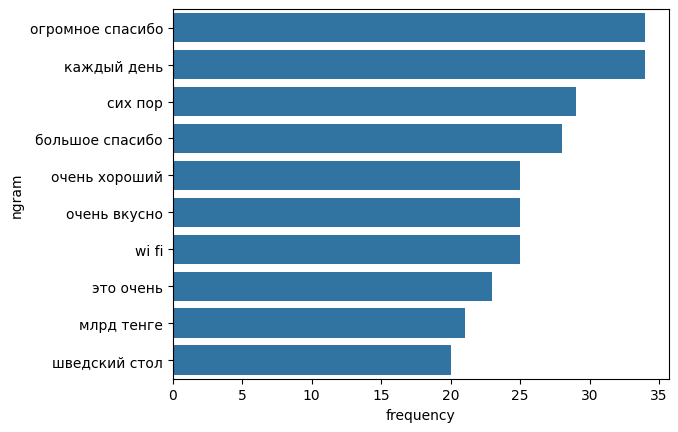

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.show()

Возможно, стоило бы убрать латиницу из датасета.

# Проведем тематическое моделирование

Протокенизируем, пролемминизируем и преобразуем в мешок слов.

In [ ]:
morph = MorphAnalyzer()

def lemmatize(doc):
    tokens = []
    for token in doc.split():
        if token and token not in stopwords.words('russian'):
            token = token.strip()
            token = morph.normal_forms(token)[0]

            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args, varargs, kw, default = inspect.getargspec(cls.__init__)
/usr/local/lib/python3.10/dist-packages/pymorphy2/units/base.py:70: DeprecationWarning: inspect.getargspec() is deprecated since Py

In [ ]:
token = dataset['text'].apply(lemmatize)

for i in range(token.shape[0]):
  if token[i] == None:
    token[i] = []

dataset['token'] = dataset['text'].apply(lemmatize)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
my_dictionary = gensim.corpora.Dictionary(token)
bow_corpus = [my_dictionary.doc2bow(doc) for doc in token]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Латентоное распределение Дирихле (LDA). Так как мы уже воспользовались библиотекой ранее, воспользуемся и ее встроенным методом LDA. Этот метод весьма популярен и хорошо подходит для нашего случая, где есть как положительные, так и отрицательные отзывы. Его недостатком является сложный выбор числа тем, которое зачастую ищется эмпирическим путем.

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 15,
                                   id2word = my_dictionary,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(10,
  '0.021*"год" + 0.018*"город" + 0.010*"казахстан" + 0.007*"который" + 0.007*"человек" + 0.005*"тысяча" + 0.005*"это" + 0.005*"являться" + 0.005*"центр" + 0.005*"время"'),
 (9,
  '0.009*"отель" + 0.006*"очень" + 0.006*"это" + 0.005*"номер" + 0.005*"and" + 0.004*"hotel" + 0.004*"свой" + 0.003*"ребёнок" + 0.003*"with" + 0.003*"мой"'),
 (5,
  '0.007*"это" + 0.004*"говорить" + 0.004*"проблема" + 0.004*"спасибо" + 0.003*"рассрочка" + 0.003*"такой" + 0.003*"место" + 0.003*"банк" + 0.003*"месяц" + 0.003*"другой"'),
 (3,
  '0.013*"банк" + 0.008*"это" + 0.007*"евразийский" + 0.006*"казахстан" + 0.005*"год" + 0.004*"компания" + 0.004*"bank" + 0.004*"евразэс" + 0.004*"проект" + 0.004*"страна"'),
 (12,
  '0.042*"отель" + 0.033*"номер" + 0.019*"очень" + 0.015*"завтрак" + 0.012*"хороший" + 0.009*"персонал" + 0.007*"отличный" + 0.007*"рядом" + 0.007*"это" + 0.006*"центр"'),
 (2,
  '0.011*"очень" + 0.009*"n" + 0.009*"это" + 0.005*"так" + 0.005*"который" + 0.004*"день" + 0.004*"ресторан" + 0.004*

Визуализируем полученные данные в график. Для выбранной части датасета число 15 неплохо подходит, при рассмотрении всего датасета пришлось бы экспериментировать снова.

In [ ]:
vis = gensimvis.prepare(lda_model, bow_corpus, my_dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12    -0.186362  0.158848       1        1  16.184994
1     -0.075931 -0.151348       2        1  12.539737
8      0.059584 -0.000889       3        1  10.027119
10     0.144342  0.052509       4        1   8.526527
0     -0.081757 -0.009686       5        1   7.947550
11     0.001853 -0.069321       6        1   7.866189
2     -0.036811  0.034224       7        1   6.723199
6     -0.026761  0.050128       8        1   6.002552
14    -0.030711 -0.075405       9        1   5.756372
4     -0.030229 -0.090000      10        1   5.267964
3      0.149701  0.055556      11        1   3.294241
7      0.001643 -0.004585      12        1   2.898684
13     0.038401 -0.024139      13        1   2.492872
9     -0.001777  0.071028      14        1   2.480989
5      0.074815  0.003080      15        1   1.991012, topic_info=        Term        Freq       Total Category  logprob  loglift
52     отель  563.000000  563.000000  Default  30.0000  30.0000
44     номер  455.000000  455.000000  Default  29.0000  29.0000
1       врач  358.000000  358.000000  Default  28.0000  28.0000
30   завтрак  197.000000  197.000000  Default  27.0000  27.0000
26     город  204.000000  204.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
830   просто    3.081490  196.986214  Topic15  -6.1694  -0.2412
46     общий    2.909828   68.506414  Topic15  -6.2268   0.7577
291      год    3.131130  377.217487  Topic15  -6.1535  -0.8749
104     свой    3.059929  212.536478  Topic15  -6.1765  -0.3242
145     цена    2.982364  133.019749  Topic15  -6.2021   0.1187

[1081 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
3147      15  0.498003      abion
1672       4  0.710766        aci
11777     15  0.620295  airbaltic
1674       4  0.710800     alatau
8265      11  0.815061      altyn
...      ...       ...        ...
1511       8  0.034170   являться
1511       9  0.034170   являться
1511      11  0.034170   являться
1511      12  0.017085   являться
1511      14  0.017085   являться

[3298 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 2, 9, 11, 1, 12, 3, 7, 15, 5, 4, 8, 14, 10, 6])

Навскидку можно выделить темы, связанные с отдыхом, ресторанами, здравоохранением и Казахстаном. Где-то посередине находится выделенная отдельно небольшая тема, связанная с криминальными новостями, при увеличении датасета и количества тем, думаю, это тема стала бы более заметной.

# Часть 2. Обучение классификатора



Воспользуемся двумя классификаторами - логистической регрессией и наивным Байесом.

In [ ]:
data_train = dataset[['text','sentiment']][:800].copy()
data_test = dataset[['text','sentiment']][800:].copy()
print(data_train,data_test)

                                                  text  sentiment
0    развода деньги наблюдаюсь лайфклиник беременно...          1
1    отель выбрали рядом стадионом отель номер боль...          0
2    вылечили гноился рождения глазик поликлинике н...          1
3    хорошее расположение вокзала дошли пешком ночь...          0
4    отличное месторасположение прекрасный вид особ...          1
..                                                 ...        ...
795  огромная благодарность спасибо огромное всему ...          1
796  спасибо работникам регистратуры пациентка ваше...          1
797  спасибо заботу продукция супер особенно живые ...          1
798  отеля своя парковка приятно приезду чекин разр...          1
799  качеству отель хороший чисто завтраки вкусные ...          0

[800 rows x 2 columns]                                                   text  sentiment
800  могу сказать знал заранее паб подвале оч мален...          0
801  останавливались сентябре ночи отелем остались .

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('russian'))

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
count_tf_idf_train = TfidfVectorizer(stop_words=list(stopwords))
tf_idf_train = count_tf_idf_train.fit_transform(data_train.text)
count_tf_idf_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(800, 21920)

TfidfVectorizer(stop_words=['всю', 'какая', 'так', 'про', 'хорошо', 'даже',
                            'из', 'этом', 'есть', 'том', 'или', 'тот', 'всегда',
                            'меня', 'с', 'о', 'мы', 'куда', 'об', 'им', 'тем',
                            'у', 'нибудь', 'через', 'при', 'ничего', 'вдруг',
                            'мой', 'для', 'здесь', ...])

In [ ]:
count_tf_idf_test = TfidfVectorizer(stop_words=stopwords)
tf_idf_test = count_tf_idf_train.transform(data_test.text)
count_tf_idf_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TfidfVectorizer(stop_words=['всю', 'какая', 'так', 'про', 'хорошо', 'даже',
                            'из', 'этом', 'есть', 'том', 'или', 'тот', 'всегда',
                            'меня', 'с', 'о', 'мы', 'куда', 'об', 'им', 'тем',
                            'у', 'нибудь', 'через', 'при', 'ничего', 'вдруг',
                            'мой', 'для', 'здесь', ...])

In [ ]:
model = LogisticRegression(random_state=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.fit(tf_idf_train, data_train['sentiment'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(random_state=0)

In [ ]:
pred_train = model.predict(tf_idf_train)
print('Accuracy: {:.2f}'.format(accuracy_score(data_train['sentiment'], pred_train)))

Accuracy: 0.99


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
predictions = model.predict(tf_idf_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_test['predictions'] = predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data_test.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentiment,text,predictions
800,0,могу сказать знал заранее паб подвале оч мален...,1
801,0,останавливались сентябре ночи отелем остались ...,1
802,1,быстрая доставка живу талдыкылгыне рст москвы ...,1
803,1,отель имеет целый ряд преимуществ своему распо...,1
804,0,ато маловразумительный адвокат навальный сдела...,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier

cl = NaiveBayesClassifier(data_train.apply(tuple, axis=1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cl.accuracy(data_test.apply(tuple, axis=1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.575